### 1. **¿Cómo ha evolucionado la participación de las fuentes renovables (solar, eólica, hidroeléctrica) en la producción de electricidad a lo largo del tiempo?**
   - Esta pregunta te permitirá ver cómo han aumentado las energías renovables en la matriz energética, y cuándo comenzó su expansión significativa.

### 2. **¿En qué años hubo un cambio significativo en la proporción de energía producida a partir de fuentes no renovables (carbón, gas, petróleo, nuclear) en comparación con fuentes renovables?**
   - Esta pregunta ayudará a identificar si hubo transiciones importantes en la manera en que se produce la electricidad, como una disminución en el uso de carbón o un aumento de la energía solar.

### 3. **¿Cuál es el impacto relativo de la energía solar y eólica en la matriz energética a partir de los 2000s?**
   - Veremos cómo estas fuentes de energía renovables más recientes se han integrado en la matriz energética, y cómo han ganado importancia en las últimas décadas.

### 4. **¿Cómo ha sido la relación entre las fuentes de energía fósiles (carbón, gas, petróleo) y las renovables en términos de producción de electricidad en los últimos años?**
   - Esta pregunta se centra en entender si las fuentes fósiles están perdiendo participación frente a las renovables, y cómo han ido cambiando las proporciones entre estas fuentes.

### 5. **¿Cuáles han sido los años con mayor producción de electricidad por cada fuente de energía y qué factores podrían haber influido en estos picos?**
   - Esto permitirá identificar años con picos o caídas en la producción y puede ayudar a correlacionar eventos externos como cambios políticos, avances tecnológicos o crisis económicas que hayan influido en la generación de electricidad.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# leemos el csv y lo pasamos a dataframe

df = pd.read_csv('datasets_limpiados/PRODUCCIÓN_ELECTRICIDAD_ITALIA_1965_2021.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 9 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Year                                                         57 non-null     int64  
 1   Electricity from coal (MWh)                                  57 non-null     float64
 2   Electricity from gas (MWh)                                   57 non-null     float64
 3   Electricity from hydro (MWh)                                 57 non-null     float64
 4   Electricity from other renewables including bioenergy (MWh)  57 non-null     float64
 5   Electricity from solar (MWh)                                 57 non-null     float64
 6   Electricity from oil (MWh)                                   57 non-null     float64
 7   Electricity from wind (MWh)                                  57 non-null     float6

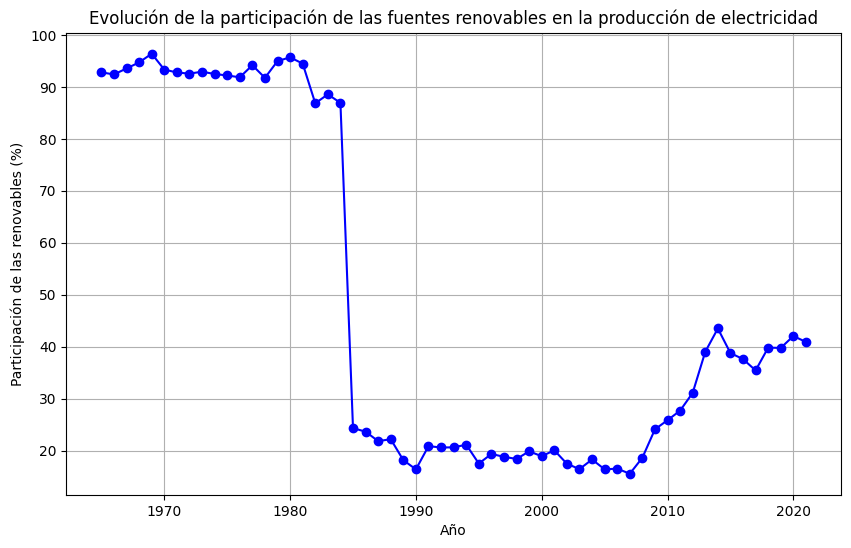

In [10]:
# PREGUNTA 1 

# Calcular el total de electricidad renovable (incluyendo otras renovables como la bioenergía)
df['total_renovables'] = df['Electricity from solar (MWh)'] + df['Electricity from wind (MWh)'] + df['Electricity from hydro (MWh)'] + df['Electricity from other renewables including bioenergy (MWh)']

# Calcular el total de electricidad generada
df['total_electricity'] = df['Electricity from coal (MWh)'] + df['Electricity from gas (MWh)'] + df['Electricity from hydro (MWh)'] + df['Electricity from other renewables including bioenergy (MWh)'] + df['Electricity from solar (MWh)'] + df['Electricity from oil (MWh)'] + df['Electricity from wind (MWh)'] + df['Electricity from nuclear (MWh)']

# Calcular la participación de las fuentes renovables
df['participacion_renovables'] = df['total_renovables'] / df['total_electricity'] * 100

# Graficar la evolución de la participación de las fuentes renovables
plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['participacion_renovables'], marker='o', color='b')
plt.title('Evolución de la participación de las fuentes renovables en la producción de electricidad')
plt.xlabel('Año')
plt.ylabel('Participación de las renovables (%)')
plt.grid(True)
plt.show()

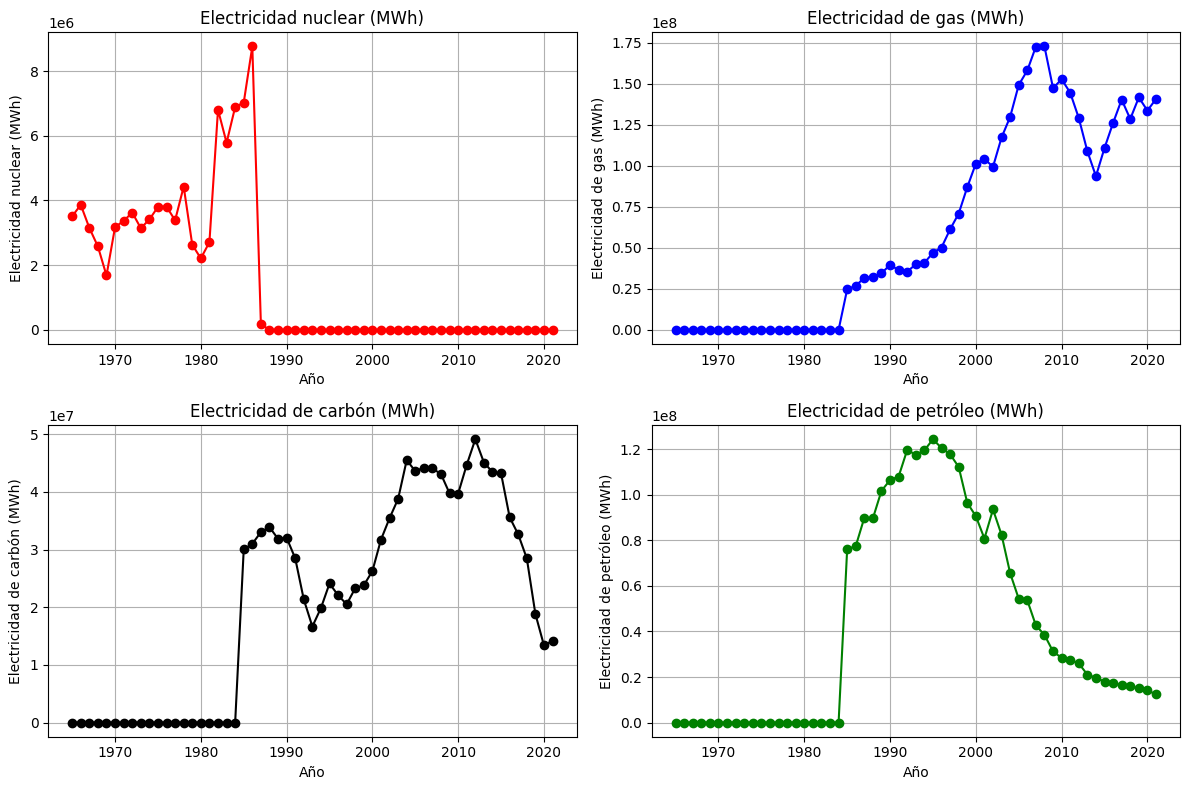

In [11]:
# Graficar la electricidad nuclear y la producción de fuentes no renovables (carbón, gas, petróleo) para observar el impacto
plt.figure(figsize=(12, 8))

# Nuclear
plt.subplot(2, 2, 1)
plt.plot(df['Year'], df['Electricity from nuclear (MWh)'], marker='o', color='red')
plt.title('Electricidad nuclear (MWh)')
plt.xlabel('Año')
plt.ylabel('Electricidad nuclear (MWh)')
plt.grid(True)

# Gas
plt.subplot(2, 2, 2)
plt.plot(df['Year'], df['Electricity from gas (MWh)'], marker='o', color='blue')
plt.title('Electricidad de gas (MWh)')
plt.xlabel('Año')
plt.ylabel('Electricidad de gas (MWh)')
plt.grid(True)

# Carbón
plt.subplot(2, 2, 3)
plt.plot(df['Year'], df['Electricity from coal (MWh)'], marker='o', color='black')
plt.title('Electricidad de carbón (MWh)')
plt.xlabel('Año')
plt.ylabel('Electricidad de carbón (MWh)')
plt.grid(True)

# Petróleo
plt.subplot(2, 2, 4)
plt.plot(df['Year'], df['Electricity from oil (MWh)'], marker='o', color='green')
plt.title('Electricidad de petróleo (MWh)')
plt.xlabel('Año')
plt.ylabel('Electricidad de petróleo (MWh)')
plt.grid(True)

plt.tight_layout()
plt.show()

Caída de la nuclear: A partir de 1988, la línea de la electricidad nuclear debería caer a cero, lo que confirmaría que el referéndum tuvo un impacto directo en la producción de electricidad de esta fuente.

Aumento de fuentes no renovables (gas, carbón, petróleo): Es posible que las líneas de gas, carbón y petróleo muestren un aumento en los años posteriores, lo que indicaría que estas fuentes no renovables están compensando la pérdida de capacidad nuclear.

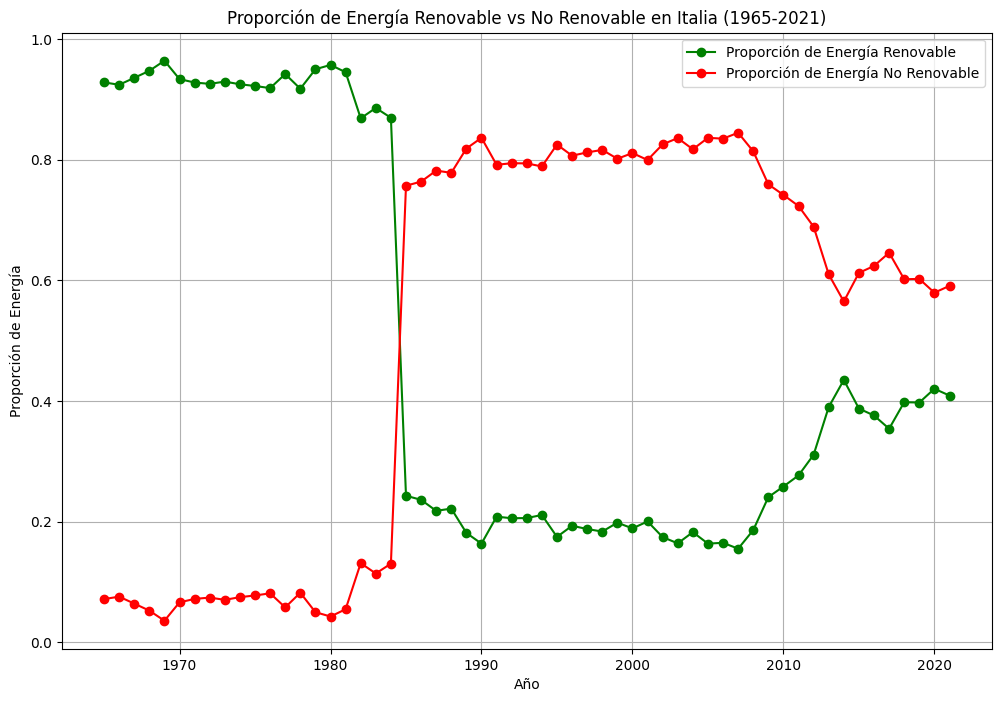

In [12]:
# PREGUNTA 2

# Calcular la energía no renovable
df['Non-Renewable Energy (MWh)'] = df['Electricity from coal (MWh)'] + df['Electricity from gas (MWh)'] + df['Electricity from oil (MWh)'] + df['Electricity from nuclear (MWh)']

# Calcular las proporciones de energía renovable y no renovable
df['Renewable Energy Proportion'] = df['total_renovables'] / (df['total_renovables'] + df['Non-Renewable Energy (MWh)'])
df['Non-Renewable Energy Proportion'] = df['Non-Renewable Energy (MWh)'] / (df['total_renovables'] + df['Non-Renewable Energy (MWh)'])

# Graficar la evolución de las proporciones
plt.figure(figsize=(12, 8))
plt.plot(df['Year'], df['Renewable Energy Proportion'], marker='o', color='green', label='Proporción de Energía Renovable')
plt.plot(df['Year'], df['Non-Renewable Energy Proportion'], marker='o', color='red', label='Proporción de Energía No Renovable')

plt.title('Proporción de Energía Renovable vs No Renovable en Italia (1965-2021)')
plt.xlabel('Año')
plt.ylabel('Proporción de Energía')
plt.legend()
plt.grid(True)
plt.show()

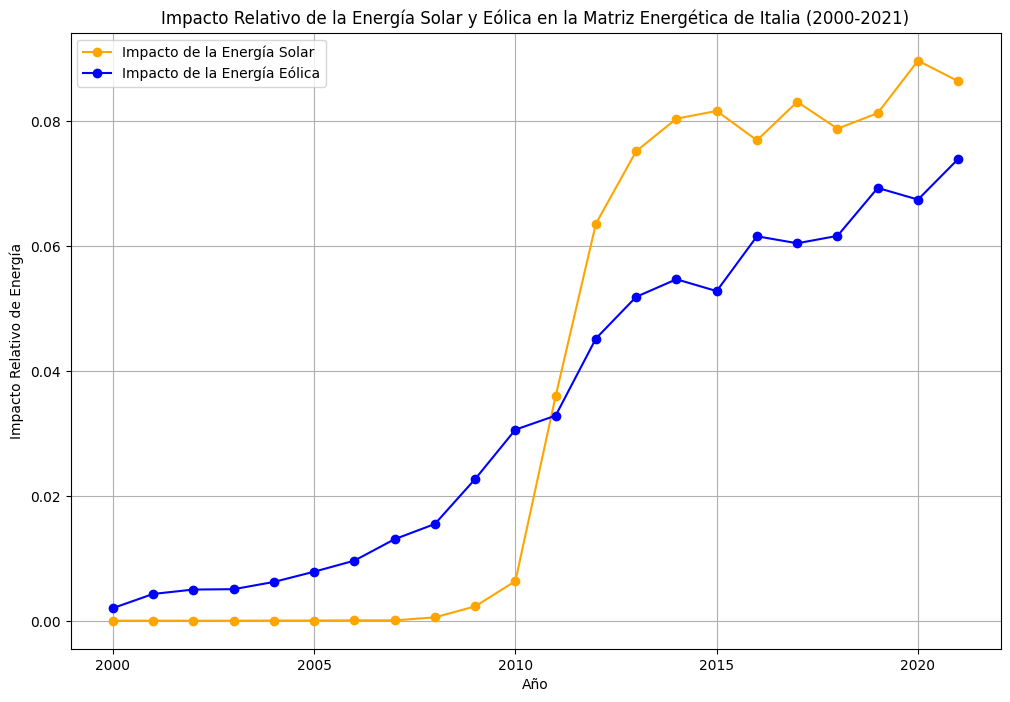

In [13]:
# PREGUNTA 3
# Filtrar los datos a partir del año 2000
df_2000s = df[df['Year'] >= 2000].copy()  # Crear una copia del DataFrame para evitar problemas de referencia

# Calcular la energía total (renovables + no renovables)
df_2000s.loc[:, 'Total Energy (MWh)'] = df_2000s['total_renovables'] + df_2000s['Non-Renewable Energy (MWh)']

# Calcular el impacto relativo de la energía solar y eólica
df_2000s.loc[:, 'Solar Impact'] = df_2000s['Electricity from solar (MWh)'] / df_2000s['Total Energy (MWh)']
df_2000s.loc[:, 'Wind Impact'] = df_2000s['Electricity from wind (MWh)'] / df_2000s['Total Energy (MWh)']

# Graficar la evolución del impacto de la energía solar y eólica
plt.figure(figsize=(12, 8))
plt.plot(df_2000s['Year'], df_2000s['Solar Impact'], marker='o', color='orange', label='Impacto de la Energía Solar')
plt.plot(df_2000s['Year'], df_2000s['Wind Impact'], marker='o', color='blue', label='Impacto de la Energía Eólica')

plt.title('Impacto Relativo de la Energía Solar y Eólica en la Matriz Energética de Italia (2000-2021)')
plt.xlabel('Año')
plt.ylabel('Impacto Relativo de Energía')
plt.legend()
plt.grid(True)
plt.show()

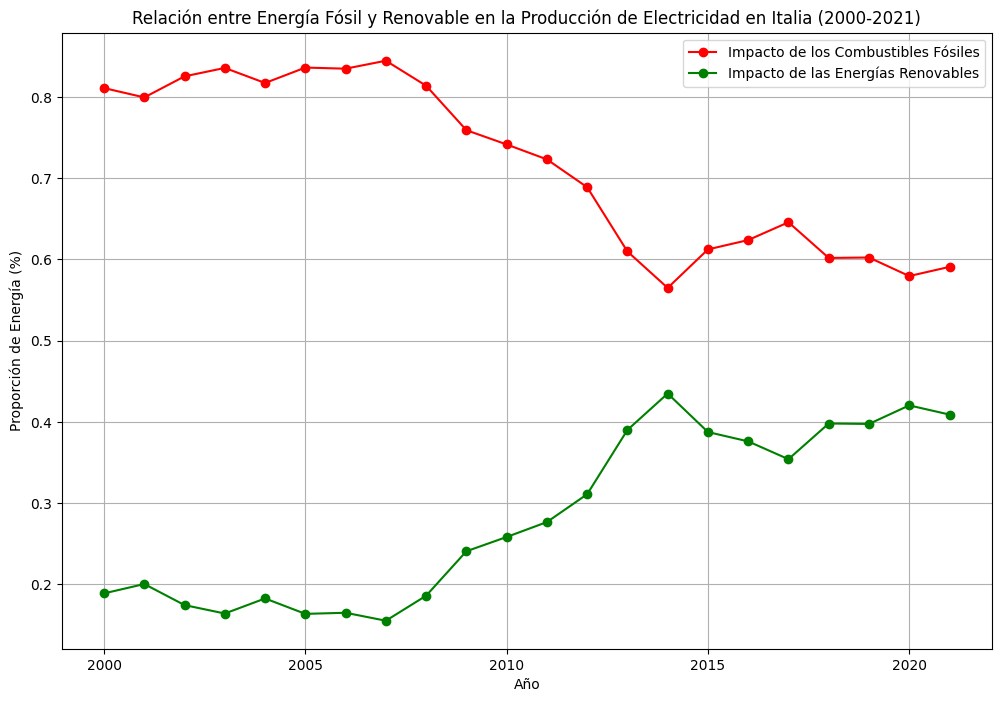

In [14]:
# PREGUNTA 4 

# Sumar la energía proveniente de fuentes fósiles (carbón, gas, petróleo)
df['Fossil Fuels Energy (MWh)'] = df['Electricity from coal (MWh)'] + df['Electricity from gas (MWh)'] + df['Electricity from oil (MWh)']

# Filtrar los datos a partir del año 2000 (o el rango de años que te interese) y hacer una copia
df_recent = df[df['Year'] >= 2000].copy()

# Calcular el impacto relativo de las fuentes fósiles
df_recent['Fossil Fuels Impact'] = df_recent['Fossil Fuels Energy (MWh)'] / (df_recent['Fossil Fuels Energy (MWh)'] + df_recent['total_renovables'])

# Graficar la evolución de la relación entre las fuentes fósiles y renovables
plt.figure(figsize=(12, 8))
plt.plot(df_recent['Year'], df_recent['Fossil Fuels Impact'], marker='o', color='red', label='Impacto de los Combustibles Fósiles')

# Añadir la parte de las renovables para comparar
df_recent['Renewables Impact'] = 1 - df_recent['Fossil Fuels Impact']
plt.plot(df_recent['Year'], df_recent['Renewables Impact'], marker='o', color='green', label='Impacto de las Energías Renovables')

plt.title('Relación entre Energía Fósil y Renovable en la Producción de Electricidad en Italia (2000-2021)')
plt.xlabel('Año')
plt.ylabel('Proporción de Energía (%)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Identificar los años con la mayor producción de electricidad por cada fuente
max_solar_year = df[df['Electricity from solar (MWh)'] == df['Electricity from solar (MWh)'].max()].reset_index(drop=True)
max_wind_year = df[df['Electricity from wind (MWh)'] == df['Electricity from wind (MWh)'].max()].reset_index(drop=True)
max_hydro_year = df[df['Electricity from hydro (MWh)'] == df['Electricity from hydro (MWh)'].max()].reset_index(drop=True)
max_coal_year = df[df['Electricity from coal (MWh)'] == df['Electricity from coal (MWh)'].max()].reset_index(drop=True)
max_gas_year = df[df['Electricity from gas (MWh)'] == df['Electricity from gas (MWh)'].max()].reset_index(drop=True)
max_oil_year = df[df['Electricity from oil (MWh)'] == df['Electricity from oil (MWh)'].max()].reset_index(drop=True)
max_nuclear_year = df[df['Electricity from nuclear (MWh)'] == df['Electricity from nuclear (MWh)'].max()].reset_index(drop=True)

# Mostrar los años con los mayores picos de producción para cada fuente de energía
picos = {
    'Energía Solar': max_solar_year[['Year', 'Electricity from solar (MWh)']],
    'Energía Eólica': max_wind_year[['Year', 'Electricity from wind (MWh)']],
    'Energía Hidroeléctrica': max_hydro_year[['Year', 'Electricity from hydro (MWh)']],
    'Carbón': max_coal_year[['Year', 'Electricity from coal (MWh)']],
    'Gas': max_gas_year[['Year', 'Electricity from gas (MWh)']],
    'Petróleo': max_oil_year[['Year', 'Electricity from oil (MWh)']],
    'Nuclear': max_nuclear_year[['Year', 'Electricity from nuclear (MWh)']],
}

# Imprimir los resultados
for fuente, pico in picos.items():
    print(f"\n{fuente} con mayor producción:")
    print(pico)


Energía Solar con mayor producción:
   Year  Electricity from solar (MWh)
0  2020                    24940000.0

Energía Eólica con mayor producción:
   Year  Electricity from wind (MWh)
0  2021                   20950000.0

Energía Hidroeléctrica con mayor producción:
   Year  Electricity from hydro (MWh)
0  2014                    58550000.0

Carbón con mayor producción:
   Year  Electricity from coal (MWh)
0  2012                   49140000.0

Gas con mayor producción:
   Year  Electricity from gas (MWh)
0  2008                 172770000.0

Petróleo con mayor producción:
   Year  Electricity from oil (MWh)
0  1995                 124420000.0

Nuclear con mayor producción:
   Year  Electricity from nuclear (MWh)
0  1986                       8758000.0
